In [1]:
try:
  import google.colab
  IN_COLAB = True
  print("Running as a Colab notebook")
  %pip install transformer_lens
except:
  IN_COLAB = False
  print("Running as a Jupyter notebook - intended for development only!")

Running as a Colab notebook
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.0/192.0 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.7/739.7 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.

In [1]:
from transformer_lens import HookedTransformer
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load model
pythia_1_4b: HookedTransformer = HookedTransformer.from_pretrained("EleutherAI/pythia-1.4b")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.93G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/396 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

Loaded pretrained model EleutherAI/pythia-1.4b into HookedTransformer


Sentences depicted in the Thesis:

L2H15: STARTING FROM<br>
L18H9: The bottom line<br>
L19H14: Striking the<br>
L19H1: I do believe that a great work of art strikes a subtle<br>
L14H5: I beat a heavy

In [6]:
# Process prompt
idiom_sent = 'I beat a heavy'
pythia_1_4b_logits, pythia_1_4b_cache = pythia_1_4b.run_with_cache(idiom_sent, remove_batch_dim=True)
idiom_str_tokens = pythia_1_4b.to_str_tokens(idiom_sent)

In [7]:
# Get attention pattern
layer = 14
selected_head = 5
attn = pythia_1_4b_cache["pattern", layer][selected_head]

Text(50.22222222222221, 0.5, 'tgt')

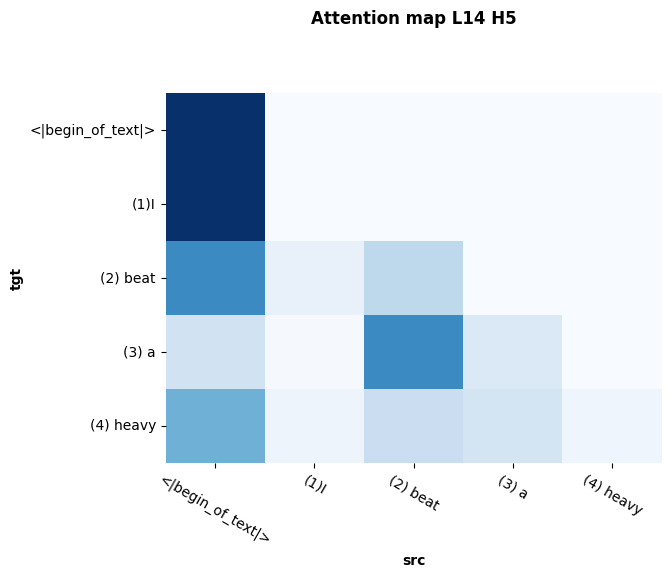

In [8]:
# Visualize attention pattern
captions = [f"({i}){t}" for i, t in enumerate(idiom_str_tokens)]
captions[0] = "<|begin_of_text|>"
ax = sns.heatmap(attn, xticklabels = captions, yticklabels = captions, cmap="Blues", cbar = False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=-30)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.title(f"Attention map L{layer} H{selected_head}", pad = 50, fontweight="bold")
plt.xlabel("src", fontweight="bold")
plt.ylabel("tgt", fontweight="bold")